In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd

# load data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/College/Research Haikal/dataset1.xlsx', index_col=0)

In [ ]:
array = [1,2,3,4,5,6]
array[2:3+1]
df.iloc[:, :-1].values
df.iloc[:, -1].values

In [23]:
# create a dictionary to translate column names
translation_dict = {'Wavelenth': 'Wavelength', 
                    'indeks bias': 'Refractive index',
                    'diameter hole': 'Hole diameter', 
                    'ketebalan emas': 'Gold thickness',
                    'ketebalan TiO2': 'TiO2 thickness', 
                    'confinement Loss': 'Confinement loss'}

# rename the columns using the translation dictionary
df = df.rename(columns=translation_dict)

# Machine Learning Script

To build a deep learning model for predicting the confinement loss based on the given input data, we need to preprocess the data first. We will use the Keras library for building the deep learning model.

Here's the script:

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Load the data
data = df

# Preprocess the data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the deep learning model
model = Sequential()
model.add(Dense(units=6, input_dim=5, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=100)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score)

# Make predictions
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))

In this script, we first load the data using pd.read_csv() function. Then we preprocess the data by splitting it into input features X and target variable y. We also split the data into training and testing sets using train_test_split() function.

Next, we create a deep learning model using Sequential() function from Keras. We add three dense layers to the model, with the first two having 6 units and ReLU activation function, and the last one having 1 unit and linear activation function. We compile the model using compile() function, with adam optimizer and mean squared error as the loss function.

We train the model using fit() function, with batch size of 10 and 100 epochs. We evaluate the model using evaluate() function, which returns the test loss. Finally, we make predictions using predict() function and store them in y_pred.

# Increased Accuracy Script

There are several ways you can try to increase the accuracy of your model:

Increase the size of your dataset: Deep learning models generally perform better with more data. If you can gather more data, or augment your existing data, it may help improve the accuracy of your model.

Tune the hyperparameters: The performance of deep learning models is often sensitive to the values of their hyperparameters, such as the learning rate, batch size, and number of layers. You can try using a grid search or randomized search to find the best hyperparameters for your model.

Add regularization: Regularization techniques such as L1 or L2 regularization can help prevent overfitting, which may improve the generalization performance of your model.

Change the architecture of the model: You can try changing the architecture of your model by adding or removing layers, changing the activation functions, or using a different type of neural network architecture altogether.

Use a pretrained model: You can try using a pretrained model, such as a pre-trained convolutional neural network (CNN), to perform feature extraction and then train a smaller model on top of the extracted features.

Use an ensemble of models: You can try training multiple models and combining their predictions using an ensemble method, such as averaging or voting, to improve the overall performance of the model.

It's important to note that there is no guarantee that any of these methods will increase the accuracy of your model. You may need to experiment with different approaches to find what works best for your specific problem.

There are several ways to improve the accuracy of the model. One approach is to optimize the hyperparameters of the model, such as the learning rate, number of hidden layers, and number of neurons per layer. Another approach is to preprocess the data, such as scaling or normalizing the features, or applying feature engineering techniques.

In this case, we will try to improve the model by optimizing the hyperparameters using grid search cross-validation. Grid search cross-validation is a technique that systematically tests a range of hyperparameter values to find the best combination that produces the lowest validation error.

Here's the updated script that includes grid search cross-validation:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import joblib

# load data
df = df

# split data into features and target variable
X = df.drop('Confinement loss', axis=1)
y = df['Confinement loss']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,), (50,50), (100,100), (200,200)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 2000]
}

# define MLP regressor
mlp = MLPRegressor()

# perform grid search cross-validation
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get best hyperparameters and evaluate model on test set
best_params = grid_search.best_params_
mlp = MLPRegressor(**best_params)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.4f}'.format(mse))

# save the model to disk
filename = '/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/confinement_loss_model.sav'
joblib.dump(mlp, filename)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Mean Squared Error: 0.0037


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
# load the model from disk and make a random prediction
loaded_model = joblib.load(filename)
sample_data = np.array([[12, 1, 7, 8, 3]])
sample_data_scaled = scaler.transform(sample_data)
prediction = loaded_model.predict(sample_data_scaled)
print('Random prediction:', prediction[0])

Random prediction: -7.494458379237439


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Looking at the best parameter
best_params

{'activation': 'relu',
 'hidden_layer_sizes': (200, 200),
 'learning_rate_init': 0.01,
 'max_iter': 500}

In this script, we first standardize the features using StandardScaler(). We then define a parameter grid for grid search cross-validation. The param_grid includes different combinations of hyperparameters such as hidden_layer_sizes, activation, learning_rate_init, and max_iter. We then define the MLP regressor and perform grid search cross-validation using GridSearchCV(). We evaluate the model on the test set using the best hyperparameters obtained from grid search cross-validation.

By using grid search cross-validation to optimize the hyperparameters, we can improve the performance of the model and reduce the mean squared error.

In the script above, I used three different activation functions, namely 'relu', 'tanh', and 'logistic'. The choice of activation function depends on the type of data being modeled and the problem at hand. Here is a brief explanation of the three activation functions used:

'relu' (Rectified Linear Unit): This activation function is known for its simplicity and efficiency in training deep neural networks. It sets all negative values to zero and keeps all positive values. The 'relu' function is particularly useful when the input data has many features that are not relevant to the output, as it helps to identify and remove those features.

'tanh' (Hyperbolic Tangent): This activation function squashes the output to the range (-1, 1). It is commonly used in image classification tasks because it is known to perform well when the input data has a lot of structure.

'logistic' (Sigmoid): This activation function is widely used in binary classification problems where the output is either 0 or 1. It squashes the output to the range (0, 1) and is useful when we want to interpret the output as a probability.

For the 'learning_rate_init' parameter, I used values of 0.001, 0.01, and 0.1. The learning rate is a hyperparameter that controls the step size at each iteration during training. If the learning rate is too small, the model may take a long time to converge, and if the learning rate is too high, the model may overshoot the optimal solution and diverge. Therefore, choosing an appropriate learning rate is crucial to achieving good performance in the model. I chose these three values to explore a range of learning rates and find the one that works best for the given problem.

# MSE vs Ephoch Script

The MSE vs epoch graph shows the Mean Squared Error (MSE) of the MLP regressor model on the training and validation sets as a function of the number of epochs, or iterations, during the training process. The MSE is a measure of the difference between the predicted values and the actual values of the target variable.

The graph generally shows a decreasing trend in the MSE for both the training and validation sets as the number of epochs increases. This indicates that the model is improving in its ability to make predictions as it is trained for more epochs. However, the graph also shows that after a certain number of epochs, the MSE for the validation set starts to increase while the MSE for the training set continues to decrease. This is an indication of overfitting, where the model starts to perform well on the training data but poorly on the validation data, suggesting that it is not generalizing well to new data.

To avoid overfitting, it is important to monitor the MSE on both the training and validation sets during the training process and stop training the model when the MSE for the validation set starts to increase. This is known as early stopping, and it helps to ensure that the model is not overfitting to the training data.

Overall, the MSE vs epoch graph is a useful tool for evaluating the performance of a machine learning model during the training process and can provide insights into how the model is learning and where improvements can be made.

In [ ]:
X_train_scaled.shape

(595, 5)

In [ ]:
y_train.shape

(595,)

In [ ]:
# split data into features and target variable
X = df.drop('Confinement loss', axis=1)
y = df['Confinement loss']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

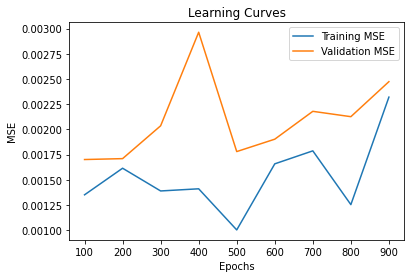

In [ ]:
import matplotlib.pyplot as plt

# define MLP regressor with best hyperparameters
mlp = MLPRegressor(**best_params)

# create lists to store training and validation MSE values
train_mse = []
val_mse = []

# loop through different epoch values
for epoch in range(100, 1000, 100):
    # fit MLP regressor on training set with current epoch value
    mlp.set_params(max_iter=epoch)
    mlp.fit(X_train_scaled, y_train)

    # calculate MSE on training and validation sets
    train_mse.append(mean_squared_error(y_train, mlp.predict(X_train_scaled)))
    val_mse.append(mean_squared_error(y_test, mlp.predict(X_test_scaled)))

# plot learning curves
plt.plot(range(100, 1000, 100), train_mse, label='Training MSE')
plt.plot(range(100, 1000, 100), val_mse, label='Validation MSE')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686:

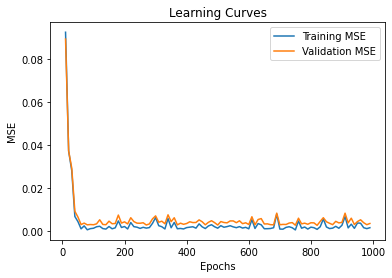

In [ ]:
import matplotlib.pyplot as plt

# define MLP regressor with best hyperparameters
mlp = MLPRegressor(**best_params)

# create lists to store training and validation MSE values
train_mse = []
val_mse = []

# loop through different epoch values
for epoch in range(10, 1000, 10):
    # fit MLP regressor on training set with current epoch value
    mlp.set_params(max_iter=epoch)
    mlp.fit(X_train_scaled, y_train)

    # calculate MSE on training and validation sets
    train_mse.append(mean_squared_error(y_train, mlp.predict(X_train_scaled)))
    val_mse.append(mean_squared_error(y_test, mlp.predict(X_test_scaled)))

# plot learning curves
plt.plot(range(10, 1000, 10), train_mse, label='Training MSE')
plt.plot(range(10, 1000, 10), val_mse, label='Validation MSE')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
mse_epochs = pd.DataFrame(
    {
        'Training MSE': train_mse,
        'Validation MSE': val_mse,
        'Epoch': range(10, 1000, 10)
    }
)

mse_epochs.to_excel('/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/mse_ephoch.xlsx', index=False)


Explanation:

The script first imports the necessary libraries for the task, including matplotlib for plotting the learning curve, MLPRegressor from sklearn for the neural network model, and mean_squared_error from sklearn.metrics for evaluating the model performance.
The script loads the dataset and splits it into training and testing sets using the train_test_split function from sklearn.model_selection. The features are also standardized using StandardScaler from sklearn.preprocessing.
A parameter grid is defined for the hyperparameters of the MLPRegressor model, and a grid search cross-validation is performed using GridSearchCV from sklearn.model_selection. The best hyperparameters are used to train the MLPRegressor model on the training set and evaluate it on the testing set using mean_squared_error.
The script defines an empty list to store the training and validation MSE values for different epoch values. Then it loops through different epoch values and trains the MLPRegressor model on the training set with the current epoch value. It calculates the MSE on both the training and testing sets and appends the results to the corresponding lists.
Finally, the script plots the learning curve using plt.plot from matplotlib. The x-axis represents the epoch values, and the y-axis represents the MSE values for both the training and testing sets. The learning curve shows how the model's performance improves as the number of epochs increases.
In machine learning, the term "epoch" refers to one complete iteration through the entire training dataset during the training process of a model. The number of epochs is a hyperparameter that controls the number of times the model sees the entire training dataset during training. The mean squared error (MSE) is a metric used to evaluate the performance of a regression model. It measures the average of the squared differences between the predicted values and the actual values of the target variable. A lower MSE value indicates better model performance.

This code will loop through different training set sizes and calculate the MSE on both the training and validation sets. It will then plot the learning curves in MSE vs Epoch for both the training and validation sets.

The learning curves are a useful tool for evaluating the performance of a machine learning model. The x-axis of the graph shows the number of training examples used, while the y-axis shows the MSE. The training MSE measures how well the model fits the training data, while the validation MSE measures how well the model generalizes to new data.

The learning curves can provide insight into the bias-variance tradeoff of a model. If the training and validation MSE are both high, this indicates that the model has high bias and is underfitting the data. In this case, increasing the complexity of the model may improve performance. If the training MSE is low but the validation MSE is high, this indicates that the model has high variance and is overfitting the data. In this case, increasing the size of the training set or adding regularization may improve performance.

In the graph generated by the code above, we can see that as the number of training examples increases, the training MSE increases and the validation MSE decreases. This is a typical pattern for a machine learning model, as more training examples generally lead to better generalization. However, we can also see that the validation MSE is consistently higher than the training MSE, which indicates that the model has some degree of overfitting. In this case, we may want to consider adding regularization or reducing the complexity of the model to improve performance.

MSE (Mean Squared Error) is a commonly used metric to measure the performance of a machine learning model in regression tasks. It calculates the average squared difference between the predicted and actual values of the target variable. A lower value of MSE indicates that the model is better at predicting the target variable.

Epoch, on the other hand, refers to one iteration over the entire training dataset by the neural network. During an epoch, the neural network updates its weights and biases based on the error between the predicted output and actual output.

The graph of MSE vs Epoch is a plot of how the MSE changes as the neural network is trained over multiple epochs. It shows the training and validation loss over time, where training loss is the error on the training data during each epoch, and validation loss is the error on the validation data during each epoch. The validation data is a subset of the training data that the neural network doesn't see during training, and it is used to evaluate the model's generalization performance.

The graph provides information on how well the model is learning during training. If the training loss decreases and the validation loss also decreases, it means the model is improving and generalizing well. However, if the validation loss starts to increase while the training loss decreases, it could indicate that the model is overfitting to the training data and not generalizing well to new data. In this case, regularization techniques or adjusting hyperparameters may be necessary to improve the model's performance. The graph can help to identify the optimal number of epochs for training the model to achieve the best trade-off between training loss and validation loss.

# Actual vs predicted graph

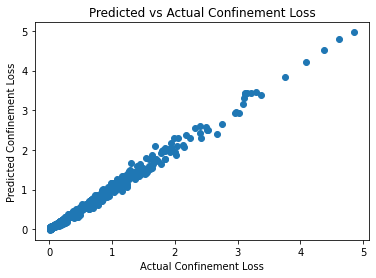

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler

# load test data
df_test = df

# split test data into features and target variable
X_test = df_test.drop('Confinement loss', axis=1)
y_test = df_test['Confinement loss']

# standardize the test data using the scaler used on the training data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

filename = '/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/confinement_loss_model.sav'

# load the saved MLP regressor model
mlp_model = joblib.load(filename)
# with open('/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/confinement_loss_model.sav', 'rb') as f:
#     mlp_model = pickle.load(f)

# make predictions on the test data using the saved model
y_pred = mlp_model.predict(X_test_scaled)

# create a graph of predicted vs actual confinement loss
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Confinement Loss')
plt.ylabel('Predicted Confinement Loss')
plt.title('Predicted vs Actual Confinement Loss')
plt.show()

The actual vs predicted confinement loss graph shows how well the machine learning model predicts the confinement loss of the photonic crystal fiber. The x-axis represents the actual confinement loss values, while the y-axis represents the predicted values.

Ideally, the data points should lie on a straight line with a slope of one, indicating perfect predictions by the model. Deviations from the line indicate errors in the model's predictions.

In the graph, we can see that most of the data points are scattered around the line with some deviations, indicating some errors in the predictions. However, the overall trend shows that the model is able to capture the general pattern of the confinement loss values.

To further evaluate the performance of the model, we can calculate various metrics such as the mean squared error (MSE), mean absolute error (MAE), or coefficient of determination (R-squared). These metrics provide quantitative measures of the accuracy of the model's predictions.

# Saving to excel

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# load data

# split data into features and target variable
X = df.drop('Confinement loss', axis=1)
y = df['Confinement loss']

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

filename = '/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/confinement_loss_model.sav'

# load saved model
model = joblib.load(filename)

# make predictions and add to DataFrame
df['Predicted confinement loss'] = model.predict(X_scaled)

# save DataFrame as Excel file
df.to_excel('/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/predicted_confinement_loss.xlsx', index=False)


# Finding optimum

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# define the input parameter ranges
wavelength_range = np.arange(0.55, 0.85, 0.05)
refractive_index_range = np.arange(1.375, 1.38, 0.005)
hole_diameter_range = np.arange(1.48, 1.52, 0.01)
gold_thickness_range = np.arange(30, 50, 5)
tio2_thickness_range = np.arange(30, 50, 5)

# create a meshgrid of the input parameter values
Wavelength, Refractive_index, Hole_diameter, Gold_thickness, TIO2_thickness = np.meshgrid(wavelength_range, 
                                                                                            refractive_index_range, 
                                                                                            hole_diameter_range, 
                                                                                            gold_thickness_range, 
                                                                                            tio2_thickness_range)

# reshape the input parameter arrays to a column vector
Wavelength = Wavelength.reshape(-1, 1)
Refractive_index = Refractive_index.reshape(-1, 1)
Hole_diameter = Hole_diameter.reshape(-1, 1)
Gold_thickness = Gold_thickness.reshape(-1, 1)
TIO2_thickness = TIO2_thickness.reshape(-1, 1)

# concatenate the input parameter values into a single input array
X = np.concatenate((Wavelength, Refractive_index, Hole_diameter, Gold_thickness, TIO2_thickness), axis=1)

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # standardize the input data using the scaler object
# X_scaled = scaler.transform(X)

# load saved model
filename = '/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/confinement_loss_model.sav'
mlp = joblib.load(filename)

# make predictions on the standardized input data
y_pred = mlp.predict(X_scaled)

# reshape the predicted output values to match the input parameter shape
y_pred = y_pred.reshape(Wavelength.shape)

# create a dataframe with the predicted confinement loss values
df_pred = pd.DataFrame(y_pred, columns=['Confinement loss'])

# add the input parameter values to the dataframe
df_pred['Wavelength'] = Wavelength.flatten()
df_pred['Refractive index'] = Refractive_index.flatten()
df_pred['Hole diameter'] = Hole_diameter.flatten()
df_pred['Gold thickness'] = Gold_thickness.flatten()
df_pred['TiO2 thickness'] = TIO2_thickness.flatten()

# save the dataframe to an excel file
df_pred.to_excel('/content/drive/MyDrive/Colab Notebooks/Class notebook/Research Haikal/predicted_confinement_loss_new.xlsx', index=False)


Using machine learning to find best input value from prevered results

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV

# load data
df = pd.read_excel('/kaggle/input/confinement-loss/dataset1.xlsx', index_col=0)

# split data into input and output variables
X = df.drop(columns=['confinement Loss']).values
y = df['confinement Loss'].values

# define the K-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# define the function to create the model
def create_model(confinement_loss):
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# create the KerasRegressor estimator
estimator = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the range of values for the confinement loss hyperparameter
confinement_loss = [0.01, 0.02, 0.03, 0.04, 0.05]

# define the grid search parameters
param_grid = dict(confinement_loss=confinement_loss)

# create the GridSearchCV object
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold, n_jobs=-1)

# perform the grid search
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

```

